# **VIRTUAL INTERNSHIP EXPERIENCE - KPMG**
---

## Task 2 - Data Insights

📑 **Objective** :
- Recommend which of these 1000 new customers should be targeted to drive the most value for the organisation using the existing 3 datasets (Customer demographic, customer address and transactions)

<br>
<br>

# **LOAD DATASET**
---

In [1]:
# import dataset
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read data set that has been cleaned
data_demo = pd.read_csv('CustomerDemographic_CLEAN.csv')
data_addr = pd.read_csv('CustomerAddress_CLEAN.csv')
data_tran = pd.read_csv('Transaction_CLEAN.csv')

# **DATA CLEANING**
---

## **1. Customer Demographic**

In [3]:
data_demo.sample(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
3361,3363,Orson,Tythacott,Male,25,2000-03-08,Electrical Engineer,Manufacturing,High Net Worth,No,Yes,3,22
1676,1678,Dale,Hursey,Female,20,1977-10-07,Editor,Financial Services,High Net Worth,No,Yes,13,45


In [4]:
# remove irrelevant columns for analysis in customer demographic 
data_demo1 = data_demo.copy()
data_demo1.drop(columns=['DOB', 'deceased_indicator', 'first_name', 'last_name'], inplace=True)

In [5]:
# convert datatype customer id
data_demo1['customer_id']= data_demo1['customer_id'].astype('object')

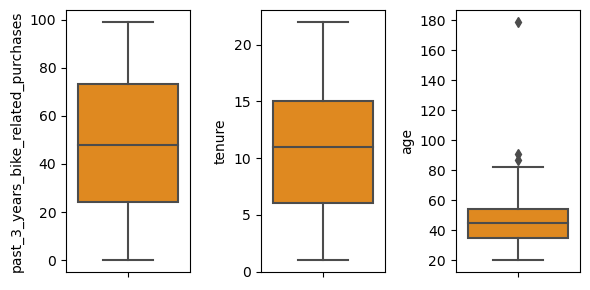

In [6]:
# check outlier
nums = data_demo1.loc[:, (data_demo1.dtypes == 'int64')].columns.tolist()
plt.figure(figsize=(6, 3))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=data_demo1[nums[i]], color='darkorange', orient='v')
    plt.tight_layout()

Thera is outlier in age

In [7]:
# handling outlier with zscore
from scipy import stats
z_scores = np.abs(stats.zscore(data_demo1['age']))
filtered = (z_scores < 3)
data_demo1 = data_demo1[filtered]

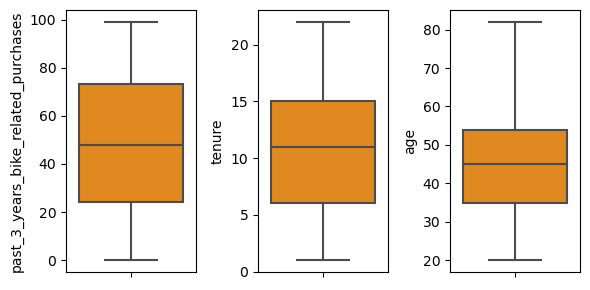

In [8]:
# after handling outlier
nums = data_demo1.loc[:, (data_demo1.dtypes == 'int64')].columns.tolist()
plt.figure(figsize=(6, 3))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=data_demo1[nums[i]], color='darkorange', orient='v')
    plt.tight_layout()

In [9]:
# create age class
data_demo1['age_class'] = (round(data_demo['age']/ 10) * 10).astype(int)

In [10]:
data_demo1.sample(2)

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,age_class
1589,1591,Male,4,Operator,Manufacturing,Mass Customer,Yes,14,46,50
2988,2990,Male,65,GIS Technical Architect,Argiculture,High Net Worth,No,8,44,40


In [11]:
data_demo1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3995 entries, 0 to 3997
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          3995 non-null   object
 1   gender                               3995 non-null   object
 2   past_3_years_bike_related_purchases  3995 non-null   int64 
 3   job_title                            3995 non-null   object
 4   job_industry_category                3995 non-null   object
 5   wealth_segment                       3995 non-null   object
 6   owns_car                             3995 non-null   object
 7   tenure                               3995 non-null   int64 
 8   age                                  3995 non-null   int64 
 9   age_class                            3995 non-null   int32 
dtypes: int32(1), int64(3), object(6)
memory usage: 327.7+ KB


## **2. Customer Address**

In [12]:
data_addr.sample(2)

,customer_id,address,postcode,state,country,property_valuation
2139,2144,47 Kensington Avenue,2650,NSW,Australia,4
1268,1273,7928 Mendota Circle,4503,QLD,Australia,2


In [13]:
# remove irrelevant columns for analysis in customer address 
data_addr1 = data_addr.copy()
data_addr1.drop(columns=['address', 'postcode', 'country'], inplace=True)

In [14]:
# convert datatype customer id
data_addr1['customer_id']= data_addr1['customer_id'].astype('object')

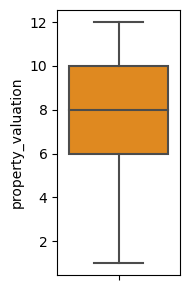

In [15]:
# check outlier
plt.figure(figsize=(2, 3))
sns.boxplot(y=data_addr1['property_valuation'], color='darkorange', orient='v')
plt.tight_layout()

In [16]:
data_addr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   state               3999 non-null   object
 2   property_valuation  3999 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 93.9+ KB


## **3. Transaction**

In [17]:
data_tran.sample(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
11857,12174,34,39,2017-05-29,False,Approved,Norco Bicycles,Road,high,large,774.53,464.72,2003-03-20
3726,3803,52,1808,2017-01-18,True,Approved,Solex,Road,medium,large,1777.80,820.78,2012-05-20


In [18]:
data_tran[data_tran['order_status']=='Cancelled'].sample(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
4741,4852,13,1762,2017-01-29,True,Cancelled,Solex,Standard,medium,medium,1163.89,589.27,2010-05-07
735,753,22,1216,2017-05-07,False,Cancelled,WeareA2B,Standard,medium,medium,60.34,45.26,1991-11-12


In [19]:
# deleting rows that order status is cancelled -> not generate revenue
data_tran1 = data_tran.copy()
data_tran1 = data_tran1[data_tran1['order_status']!='Cancelled']

In [20]:
# remove columns order status
data_tran1.drop(columns=['order_status'], inplace=True)

In [21]:
# convert to datetime
dt = ['transaction_date', 'product_first_sold_date']
data_tran1[dt] = data_tran1[dt].astype('datetime64[ns]')

In [22]:
# covert to object
ls_id = ['transaction_id', 'product_id', 'customer_id']
data_tran1[ls_id] = data_tran1[ls_id].astype('object')

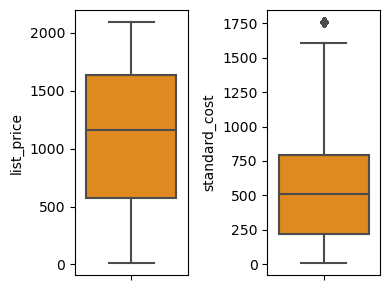

In [23]:
# check outlier
nums = ['list_price', 'standard_cost']
plt.figure(figsize=(4, 3))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=data_tran1[nums[i]], color='darkorange', orient='v')
    plt.tight_layout()

In [24]:
data_tran1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19273 entries, 0 to 19444
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19273 non-null  object        
 1   product_id               19273 non-null  object        
 2   customer_id              19273 non-null  object        
 3   transaction_date         19273 non-null  datetime64[ns]
 4   online_order             19273 non-null  bool          
 5   brand                    19273 non-null  object        
 6   product_line             19273 non-null  object        
 7   product_class            19273 non-null  object        
 8   product_size             19273 non-null  object        
 9   list_price               19273 non-null  float64       
 10  standard_cost            19273 non-null  float64       
 11  product_first_sold_date  19273 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](2), f

## **4. Combine the Dataset Into Single Dataset**

### **4.1. Merge Demographic and Address**

In [25]:
# merge data demographic and addres
demo_addr = pd.merge(data_demo1, data_addr1, on='customer_id')
demo_addr.sample(2)

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,age_class,state,property_valuation
2836,2845,Female,1,Staff Accountant III,Financial Services,Mass Customer,No,11,48,50,QLD,7
2800,2809,Female,44,Statistician IV,Retail,Mass Customer,No,10,53,50,VIC,12


### **4.2. Merge demo_addr and Transaction**

In [26]:
data_all = pd.merge(data_tran1, demo_addr, on='customer_id')
data_all.sample(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,...,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,age_class,state,property_valuation
7210,1446,54,249,2017-06-19,False,WeareA2B,Standard,medium,medium,1807.45,...,65,Quality Control Specialist,IT,High Net Worth,No,9,30,30,NSW,11
1335,2301,47,369,2017-06-14,False,Trek Bicycles,Road,low,small,1720.70,...,19,Actuary,Financial Services,Mass Customer,Yes,9,31,30,VIC,10


### **4.3. Check Merged Dataframe**

In [27]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19214 entries, 0 to 19213
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19214 non-null  object        
 1   product_id                           19214 non-null  object        
 2   customer_id                          19214 non-null  object        
 3   transaction_date                     19214 non-null  datetime64[ns]
 4   online_order                         19214 non-null  bool          
 5   brand                                19214 non-null  object        
 6   product_line                         19214 non-null  object        
 7   product_class                        19214 non-null  object        
 8   product_size                         19214 non-null  object        
 9   list_price                           19214 non-null  float64       
 10  standard_c

# **EDA**
---

In [28]:
# making a copy of dataset for backing up
data_merged = data_all.copy()
data_merged.reset_index(inplace = True, drop = True)

## **1. Numerical Data**

In [29]:
# columns numerical
nums = ['list_price', 'standard_cost', 'past_3_years_bike_related_purchases', 'tenure', 'age', 'property_valuation']

In [30]:
# descriptive statistics
data_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
list_price,19214.0,1106.691673,582.937607,12.01,575.27,1163.89,1635.3,2091.47
standard_cost,19214.0,555.215791,405.356628,7.21,215.14,507.58,795.1,1759.85
past_3_years_bike_related_purchases,19214.0,48.770792,28.599226,0.00,24.00,48.00,73.0,99.00
tenure,19214.0,10.662278,5.675848,1.00,6.00,11.00,15.0,22.00
age,19214.0,44.825023,12.575087,20.00,35.00,45.00,54.0,82.00
age_class,19214.0,44.574789,13.102648,20.00,40.00,40.00,50.0,80.00
property_valuation,19214.0,7.518320,2.824607,1.00,6.00,8.00,10.0,12.00


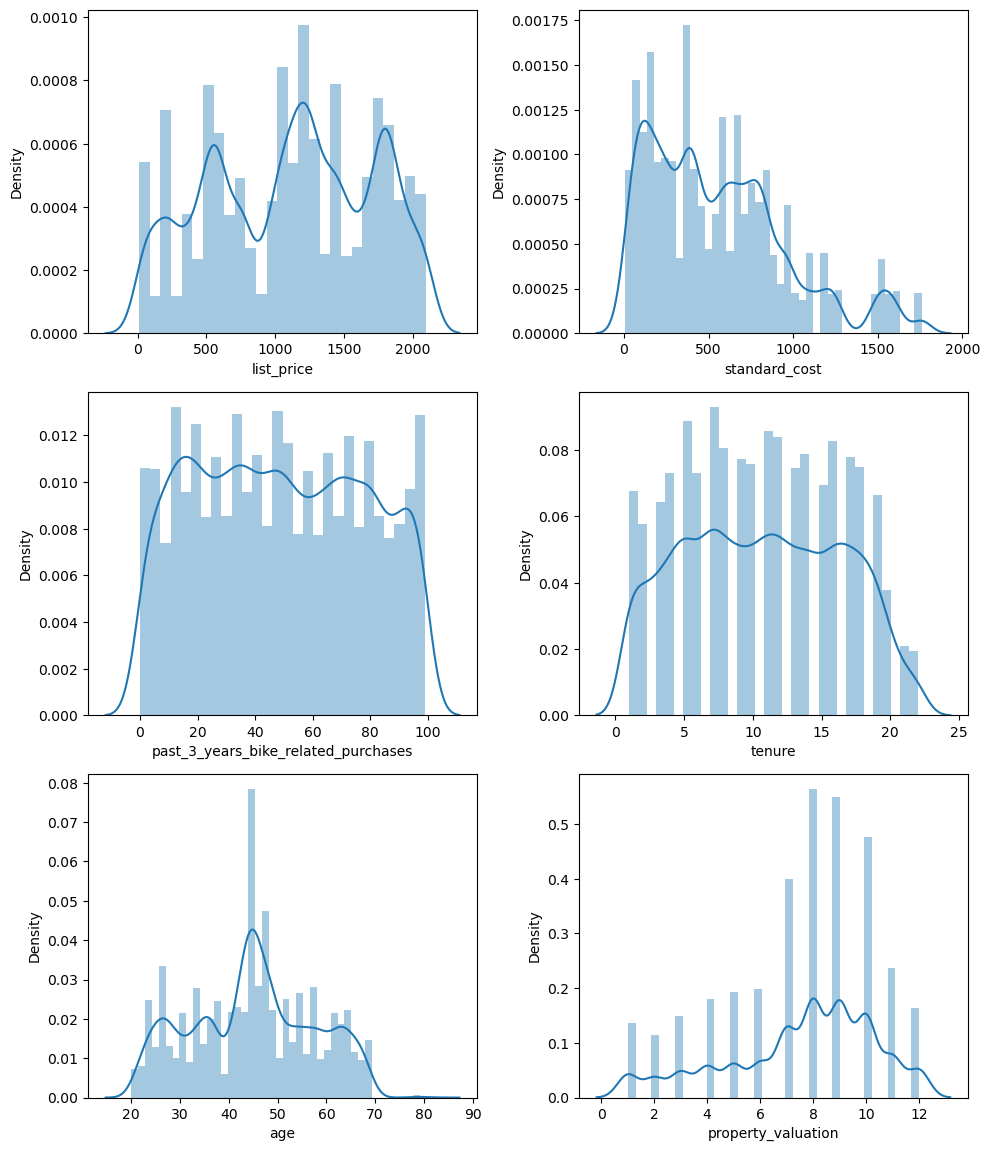

In [31]:
# distribution
plt.figure(figsize=(10, 15))
for i in range(0, len(nums)):
    plt.subplot(4, 2, i+1)
    sns.distplot(data_merged[nums[i]])
    plt.tight_layout()

## **2. Non Numerical Data**

### **2.1. Customer Data**

In [32]:
data_cust = data_merged.copy()

In [33]:
data_cust[['gender', 'job_title', 'job_industry_category', 'wealth_segment', 'owns_car', 'state']].describe().T

,count,unique,top,freq
gender,19214,2,Female,10065
job_title,19214,195,Legal Assistant,244
job_industry_category,19214,9,Manufacturing,4600
wealth_segment,19214,3,Mass Customer,9657
owns_car,19214,2,Yes,9699
state,19214,3,NSW,10254


#### **Gender with Age Distribution**
---

In [34]:
gender_age = data_cust.groupby(['age_class', 'gender'])['gender'].count()
gender_age = gender_age.reset_index(name='count')
gender_age['percentage'] =  (100 * gender_age['count'] / gender_age.groupby('age_class')['count'].transform('sum')).round(2)

In [35]:
pvt = gender_age.pivot_table(index='age_class', columns='gender', values=['count', 'percentage'])
pvt

count       percentage       
gender    Female  Male     Female   Male
age_class                               
20           718   708      50.35  49.65
30          1609  1492      51.89  48.11
40          2886  2768      51.04  48.96
50          2442  1882      56.48  43.52
60          1894  1832      50.83  49.17
70           510   455      52.85  47.15
80             6    12      33.33  66.67

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '20'),
  Text(1, 0, '30'),
  Text(2, 0, '40'),
  Text(3, 0, '50'),
  Text(4, 0, '60'),
  Text(5, 0, '70'),
  Text(6, 0, '80')])

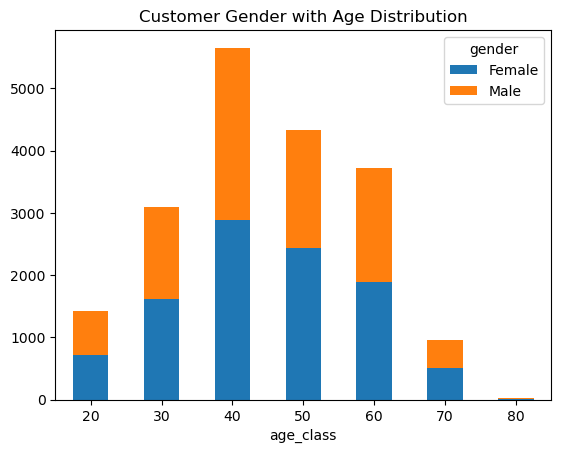

In [36]:
pvt_count = gender_age.pivot_table(index='age_class', columns='gender', values='count')
pvt_count.plot(kind='bar', stacked=True)
plt.title('Customer Gender with Age Distribution')
plt.xticks(rotation=360)

#### **Gender with Wealth Segment Distribution**
---

In [37]:
wealth_gender = data_cust.groupby(['wealth_segment', 'gender'])['gender'].count()
wealth_gender = wealth_gender.reset_index(name='count')
wealth_gender['percentage'] =  (100 * wealth_gender['count'] / wealth_gender.groupby('wealth_segment')['count'].transform('sum')).round(2)

pvt = wealth_gender.pivot_table(index='wealth_segment', columns='gender', values=['count', 'percentage'])
pvt

count       percentage       
gender            Female  Male     Female   Male
wealth_segment                                  
Affluent Customer   2356  2284      50.78  49.22
High Net Worth      2546  2371      51.78  48.22
Mass Customer       5163  4494      53.46  46.54

(array([0, 1, 2]),
 [Text(0, 0, 'Affluent Customer'),
  Text(1, 0, 'High Net Worth'),
  Text(2, 0, 'Mass Customer')])

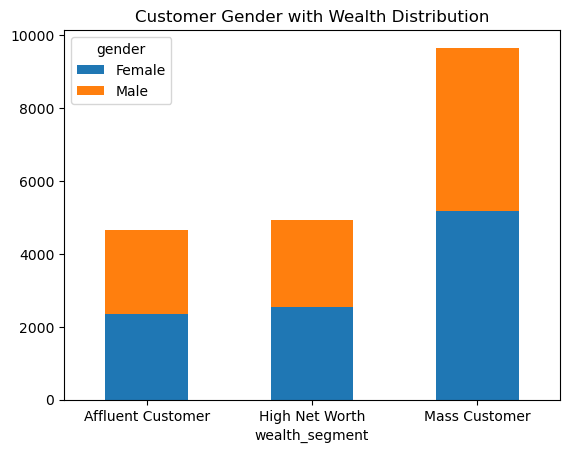

In [38]:
pvt_count = wealth_gender.pivot_table(index='wealth_segment', columns='gender', values='count')
pvt_count.plot(kind='bar', stacked=True)
plt.title('Customer Gender with Wealth Distribution')
plt.xticks(rotation=360)

#### **Wealth Segment with Age Distribution**
---

In [39]:
wealth_age = data_cust.groupby(['age_class', 'wealth_segment'])['wealth_segment'].count()
wealth_age = wealth_age.reset_index(name='count')
wealth_age['percentage'] =  (100 * wealth_age['count'] / wealth_age.groupby('age_class')['count'].transform('sum')).round(2)

pvt = wealth_age.pivot_table(index='age_class', columns='wealth_segment', values=['count', 'percentage'])
pvt

count                               \
wealth_segment Affluent Customer High Net Worth Mass Customer   
age_class                                                       
20                           355            328           743   
30                           795            784          1522   
40                          1271           1470          2913   
50                          1058           1153          2113   
60                           942            943          1841   
70                           214            232           519   
80                             5              7             6   

                      percentage                               
wealth_segment Affluent Customer High Net Worth Mass Customer  
age_class                                                      
20                         24.89          23.00         52.10  
30                         25.64          25.28         49.08  
40                         22.48          26.00         51.52  
50                         24.47          26.67         48.87  
60                         25.28          25.31         49.41  
70                         22.18          24.04         53.78  
80                         27.78          38.89         33.33

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '20'),
  Text(1, 0, '30'),
  Text(2, 0, '40'),
  Text(3, 0, '50'),
  Text(4, 0, '60'),
  Text(5, 0, '70'),
  Text(6, 0, '80')])

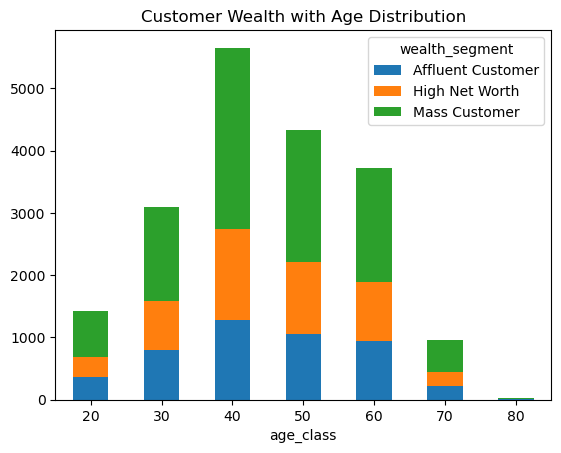

In [40]:
pvt_count = wealth_age.pivot_table(index='age_class', columns='wealth_segment', values='count')
pvt_count.plot(kind='bar', stacked=True)
plt.title('Customer Wealth with Age Distribution')
plt.xticks(rotation=360)

#### **Has Own Car with Wealth Segment Distribution**
---

In [41]:
wealth_car = data_cust.groupby(['wealth_segment', 'owns_car'])['owns_car'].count()
wealth_car = wealth_car.reset_index(name='count')
wealth_car['percentage'] =  (100 * wealth_car['count'] / wealth_car.groupby('wealth_segment')['count'].transform('sum')).round(2)
wealth_car
pvt = wealth_car.pivot_table(index='wealth_segment', columns='owns_car', values=['count', 'percentage'])
pvt

count       percentage       
owns_car             No   Yes         No    Yes
wealth_segment                                 
Affluent Customer  2182  2458      47.03  52.97
High Net Worth     2447  2470      49.77  50.23
Mass Customer      4886  4771      50.60  49.40

(array([0, 1, 2]),
 [Text(0, 0, 'Affluent Customer'),
  Text(1, 0, 'High Net Worth'),
  Text(2, 0, 'Mass Customer')])

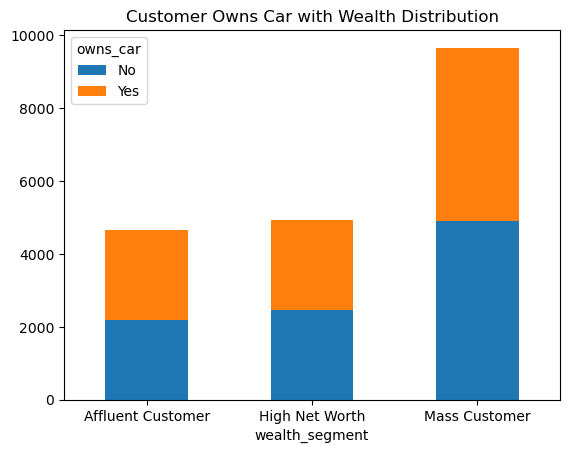

In [42]:
pvt_count = wealth_car.pivot_table(index='wealth_segment', columns='owns_car', values='count')
pvt_count.plot(kind='bar', stacked=True)
plt.title('Customer Owns Car with Wealth Distribution')
plt.xticks(rotation=360)

#### **Wealth Segment with State Distribution**
---

In [43]:
wealth_state = data_cust.groupby(['state', 'wealth_segment'])['wealth_segment'].count()
wealth_state = wealth_state.reset_index(name='count')
wealth_state['percentage'] =  (100 * wealth_state['count'] / wealth_state.groupby('state')['count'].transform('sum')).round(2)

pvt = wealth_state.pivot_table(index='state', columns='wealth_segment', values=['count', 'percentage'])
pvt

count                               \
wealth_segment Affluent Customer High Net Worth Mass Customer   
state                                                           
NSW                         2457           2661          5136   
QLD                         1000           1055          2048   
VIC                         1183           1201          2473   

                      percentage                               
wealth_segment Affluent Customer High Net Worth Mass Customer  
state                                                          
NSW                        23.96          25.95         50.09  
QLD                        24.37          25.71         49.91  
VIC                        24.36          24.73         50.92

(array([0, 1, 2]), [Text(0, 0, 'NSW'), Text(1, 0, 'QLD'), Text(2, 0, 'VIC')])

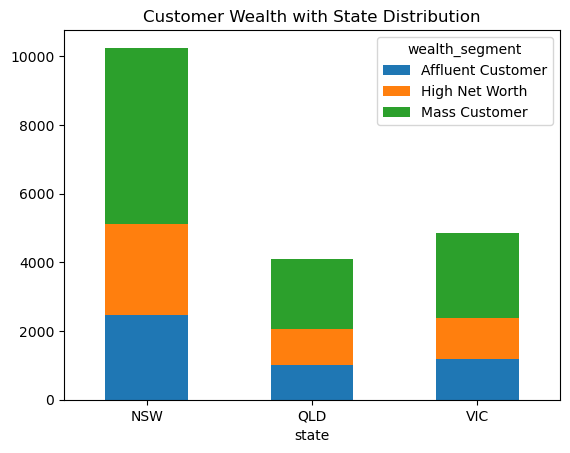

In [44]:
pvt_count = wealth_state.pivot_table(index='state', columns='wealth_segment', values='count')
pvt_count.plot(kind='bar', stacked=True)
plt.title('Customer Wealth with State Distribution')
plt.xticks(rotation=360)

#### **Job Industry Distribution**
---

In [45]:
# job industry percentage
industry = data_cust['job_industry_category'].value_counts().reset_index()
industry.columns = ['job_industry', 'count']
industry['percentage'] = (industry['count']/industry['count'].sum()*100).round(2)
industry

,job_industry,count,percentage
0,Manufacturing,4600,23.94
1,Financial Services,4446,23.14
2,Health,3526,18.35
3,Retail,2031,10.57
4,Property,1489,7.75
5,IT,1262,6.57
6,Entertainment,795,4.14
7,Argiculture,662,3.45
8,Telecommunications,403,2.10


Text(0, 0.5, 'Percentage')

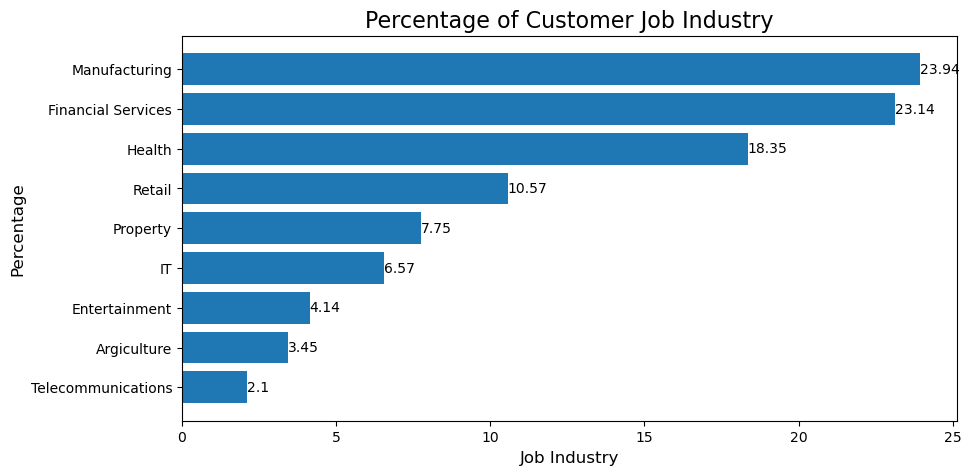

In [48]:
# visualizing job industry
fig, ax = plt.subplots(figsize=(10,5))

industry_sort = industry.sort_values(by=['percentage']).reset_index(drop=True)

bars = plt.barh(y=industry_sort['job_industry'], width= industry_sort['percentage'])
plt.bar_label(ax.containers[0]) 
plt.title('Percentage of Customer Job Industry', fontsize=16)
plt.xlabel('Job Industry',fontsize=12)
plt.ylabel('Percentage',fontsize=12)

In [49]:
# top 10 job title
title = data_cust['job_title'].value_counts().reset_index()
title.columns = ['job_title', 'count']
title['percentage'] = (title['count']/title['count'].sum()*100).round(2)
top10title = title.head(10)
top10title

,job_title,count,percentage
0,Legal Assistant,244,1.27
1,Business Systems Development Analyst,238,1.24
2,Social Worker,234,1.22
3,Chemical Engineer,231,1.20
4,Assistant Professor,229,1.19
5,Executive Secretary,225,1.17
6,Internal Auditor,223,1.16
7,Recruiter,217,1.13
8,Information Systems Manager,214,1.11
9,Product Engineer,211,1.10


In [50]:
# underated 10 job title
title = data_cust['job_title'].value_counts().reset_index()
title.columns = ['job_title', 'count']
title['percentage'] = (title['count']/title['count'].sum()*100).round(2)
under10title = title.tail(10)
under10title.sort_values(by='percentage')

,job_title,count,percentage
193,Research Assistant III,8,0.04
194,Developer I,7,0.04
192,Health Coach III,14,0.07
187,Computer Systems Analyst III,16,0.08
188,Systems Administrator IV,16,0.08
189,Geologist II,16,0.08
190,Account Representative II,16,0.08
191,Administrative Assistant I,15,0.08
185,Staff Accountant I,18,0.09
186,Biostatistician III,18,0.09


#### **Wealth Segment with Job Distribution**
---

In [51]:
wj = data_cust.groupby(['job_industry_category', 'wealth_segment'])['wealth_segment'].count()
wj = wj.reset_index(name='count')
wj['percentage'] =  (100 * wj['count'] / wj.groupby('job_industry_category')['count'].transform('sum')).round(2)

pvt = wj.pivot_table(columns='wealth_segment', index='job_industry_category', values=['count', 'percentage'])
pvt

count                               \
wealth_segment        Affluent Customer High Net Worth Mass Customer   
job_industry_category                                                  
Argiculture                         114            200           348   
Entertainment                       172            211           412   
Financial Services                 1120           1220          2106   
Health                              812            840          1874   
IT                                  314            311           637   
Manufacturing                      1234           1044          2322   
Property                            300            458           731   
Retail                              474            537          1020   
Telecommunications                  100             96           207   

                             percentage                               
wealth_segment        Affluent Customer High Net Worth Mass Customer  
job_industry_category                                                 
Argiculture                       17.22          30.21         52.57  
Entertainment                     21.64          26.54         51.82  
Financial Services                25.19          27.44         47.37  
Health                            23.03          23.82         53.15  
IT                                24.88          24.64         50.48  
Manufacturing                     26.83          22.70         50.48  
Property                          20.15          30.76         49.09  
Retail                            23.34          26.44         50.22  
Telecommunications                24.81          23.82         51.36

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Argiculture'),
  Text(1, 0, 'Entertainment'),
  Text(2, 0, 'Financial Services'),
  Text(3, 0, 'Health'),
  Text(4, 0, 'IT'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Property'),
  Text(7, 0, 'Retail'),
  Text(8, 0, 'Telecommunications')])

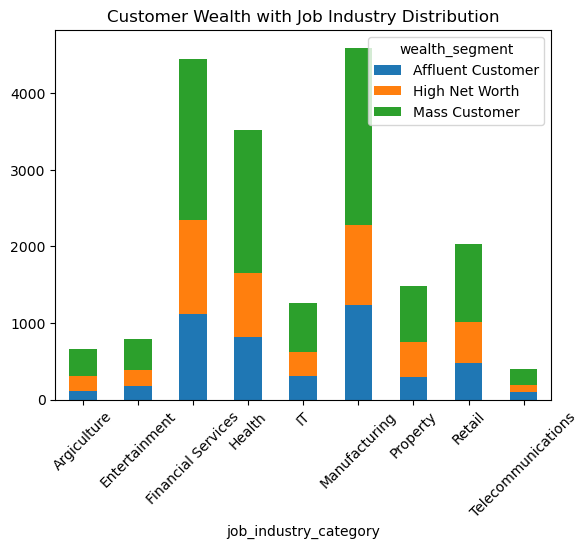

In [52]:
pvt_count = wj.pivot_table(index='job_industry_category', columns='wealth_segment', values='count')
pvt_count.plot(kind='bar', stacked=True)
plt.title('Customer Wealth with Job Industry Distribution')
plt.xticks(rotation=45)

### **2.2. Product Data**

In [53]:
data_product = data_merged.copy()

In [54]:
data_product[['brand', 'product_line', 'product_class', 'product_size']].describe().T

,count,unique,top,freq
brand,19214,6,Solex,4117
product_line,19214,4,Standard,13755
product_class,19214,3,medium,13420
product_size,19214,3,medium,12620


In [55]:
# brand percentage
brand = data_cust['brand'].value_counts().reset_index()
brand.columns = ['brand', 'count']
brand['percentage'] = (brand['count']/brand['count'].sum()*100).round(2)
brand

,brand,count,percentage
0,Solex,4117,21.43
1,Giant Bicycles,3210,16.71
2,WeareA2B,3204,16.68
3,OHM Cycles,2958,15.40
4,Trek Bicycles,2893,15.06
5,Norco Bicycles,2832,14.74


Text(0, 0.5, 'Percentage')

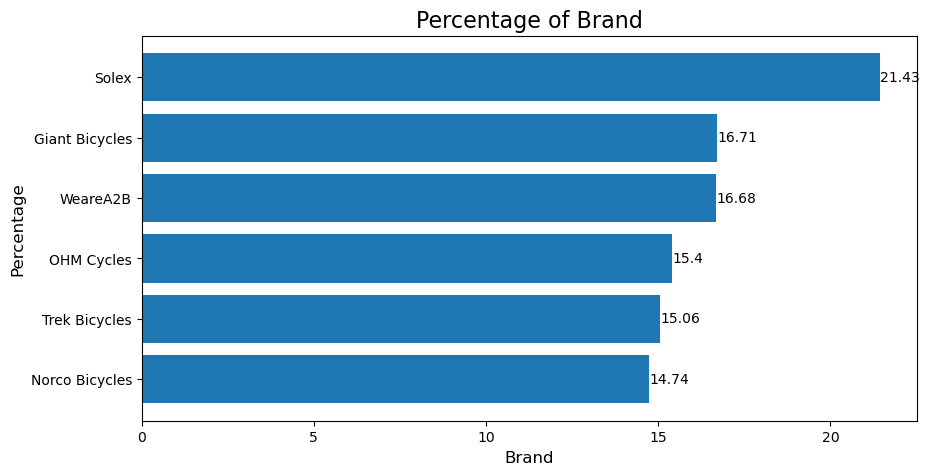

In [56]:
# visualizing job industry
fig, ax = plt.subplots(figsize=(10,5))

brand_sort = brand.sort_values(by=['percentage']).reset_index(drop=True)

bars = plt.barh(y=brand_sort['brand'], width= brand_sort['percentage'])
plt.bar_label(ax.containers[0]) 
plt.title('Percentage of Brand', fontsize=16)
plt.xlabel('Brand',fontsize=12)
plt.ylabel('Percentage',fontsize=12)

#### **Percentage of Product Line with Brand Distribution**
---

In [57]:
line = data_product.groupby(['brand', 'product_line'])['product_line'].count()
line = line.reset_index(name='count')
line['percentage'] =  (100 * line['count'] / line.groupby('brand')['count'].transform('sum')).round(2)

pvt = line.pivot_table(columns='product_line', index='brand', values=['count', 'percentage'])
pvt.fillna(0)

count                         percentage                  \
product_line   Mountain   Road Standard Touring   Mountain   Road Standard   
brand                                                                        
Giant Bicycles      0.0  566.0   2469.0   175.0       0.00  17.63    76.92   
Norco Bicycles    194.0  898.0   1740.0     0.0       6.85  31.71    61.44   
OHM Cycles          0.0  758.0   1975.0   225.0       0.00  25.63    66.77   
Solex               0.0  513.0   3408.0   196.0       0.00  12.46    82.78   
Trek Bicycles     217.0  961.0   1715.0     0.0       7.50  33.22    59.28   
WeareA2B            0.0  151.0   2448.0   605.0       0.00   4.71    76.40   

                        
product_line   Touring  
brand                   
Giant Bicycles    5.45  
Norco Bicycles    0.00  
OHM Cycles        7.61  
Solex             4.76  
Trek Bicycles     0.00  
WeareA2B         18.88

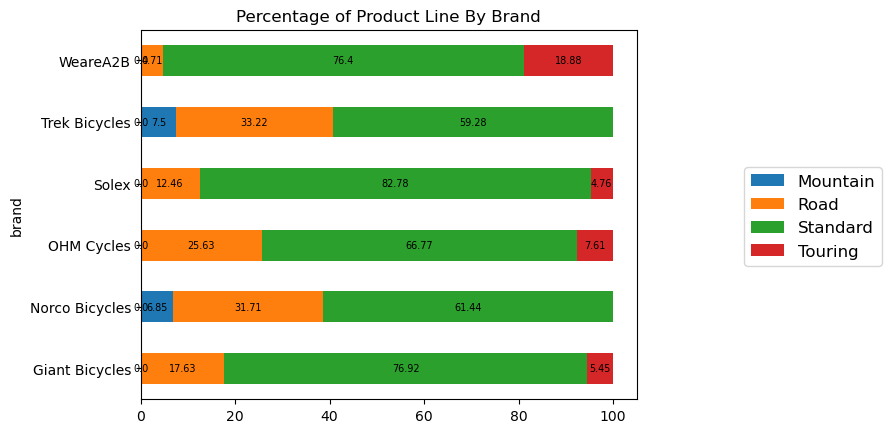

In [58]:
pvt_count = line.pivot_table(index='brand', columns='product_line', values='percentage')

ax = pvt_count.plot(kind='barh', stacked=True)
plt.title('Percentage of Product Line By Brand')
plt.xticks(rotation=360)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(round(width, 2)), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center', fontsize=7)
    
plt.legend(bbox_to_anchor=(1.2, 0.65), fontsize=12)

#### **Percentage of Product Class with Brand Distribution**
---

In [59]:
clas = data_product.groupby(['brand', 'product_class'])['product_class'].count()
clas = clas.reset_index(name='count')
clas['percentage'] =  (100 * clas['count'] / clas.groupby('brand')['count'].transform('sum')).round(2)

pvt = clas.pivot_table(columns='product_class', index='brand', values=['count', 'percentage'])
pvt.fillna(0)

count                percentage              
product_class    high    low  medium       high    low medium
brand                                                        
Giant Bicycles  756.0  190.0  2264.0      23.55   5.92  70.53
Norco Bicycles  553.0  612.0  1667.0      19.53  21.61  58.86
OHM Cycles      747.0  596.0  1615.0      25.25  20.15  54.60
Solex           547.0  397.0  3173.0      13.29   9.64  77.07
Trek Bicycles   312.0  763.0  1818.0      10.78  26.37  62.84
WeareA2B          0.0  321.0  2883.0       0.00  10.02  89.98

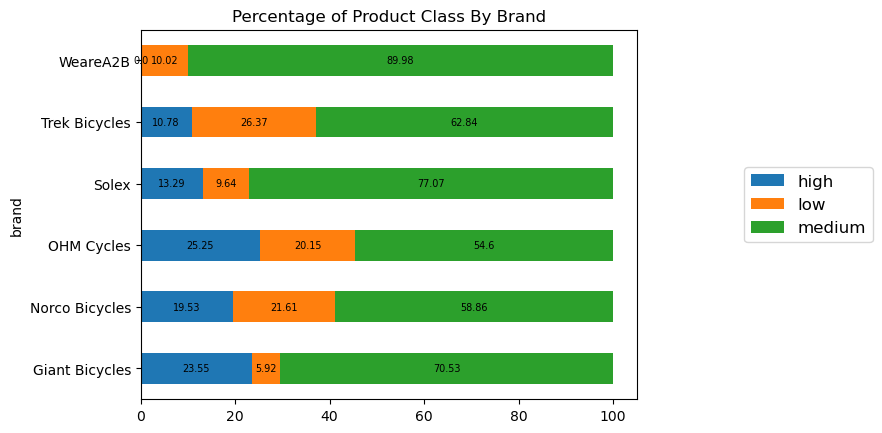

In [60]:
pvt_count = clas.pivot_table(index='brand', columns='product_class', values='percentage')

ax = pvt_count.plot(kind='barh', stacked=True)
plt.title('Percentage of Product Class By Brand')
plt.xticks(rotation=360)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(round(width, 2)), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center', fontsize=7)
    
plt.legend(bbox_to_anchor=(1.2, 0.65), fontsize=12)

#### **Percentage of Product Size with Brand Distribution**
---

In [61]:
size = data_product.groupby(['brand', 'product_size'])['product_size'].count()
size = size.reset_index(name='count')
size['percentage'] =  (100 * size['count'] / size.groupby('brand')['count'].transform('sum')).round(2)

pvt = size.pivot_table(columns='product_size', index='brand', values=['count', 'percentage'])
pvt

count              percentage              
product_size   large medium small      large medium  small
brand                                                     
Giant Bicycles   916   1730   564      28.54  53.89  17.57
Norco Bicycles   399   1688   745      14.09  59.60  26.31
OHM Cycles       192   2573   193       6.49  86.98   6.52
Solex           1050   2890   177      25.50  70.20   4.30
Trek Bicycles    878   1487   528      30.35  51.40  18.25
WeareA2B         418   2252   534      13.05  70.29  16.67

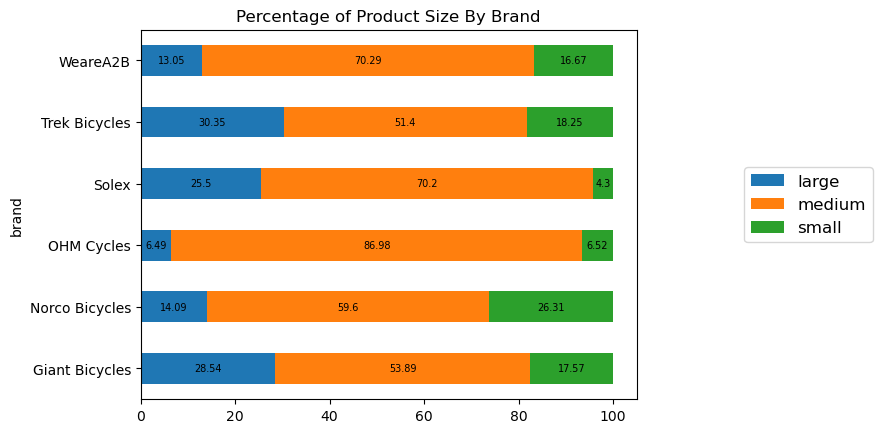

In [62]:
pvt_count = size.pivot_table(index='brand', columns='product_size', values='percentage')

ax = pvt_count.plot(kind='barh', stacked=True)
plt.title('Percentage of Product Size By Brand')
plt.xticks(rotation=360)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(round(width, 2)), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center', fontsize=7)
    
plt.legend(bbox_to_anchor=(1.2, 0.65), fontsize=12)

### **2.3. Transaction Data**

In [63]:
# making backup dataset
data_transaction = data_merged.copy()

In [64]:
# deeper analysis of datetime data by breaking it down into more specific parts
data_transaction['transaction_year'] = data_transaction['transaction_date'].dt.strftime('%Y')
data_transaction['transaction_month'] = data_transaction['transaction_date'].dt.strftime('%B')
data_transaction['transaction_quarter'] = data_transaction['transaction_date'].dt.quarter.astype(str)
data_transaction['transaction_day'] = data_transaction['transaction_date'].dt.strftime('%d')
data_transaction['transaction_weekday'] = data_transaction['transaction_date'].dt.strftime('%A')
data_transaction.drop(['transaction_date'],axis=1,inplace=True)
data_transaction.sample(3)

,transaction_id,product_id,customer_id,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,...,tenure,age,age_class,state,property_valuation,transaction_year,transaction_month,transaction_quarter,transaction_day,transaction_weekday
6564,11642,49,2472,True,Solex,Standard,medium,large,1061.56,733.58,...,16,33,30,VIC,7,2017,March,1,29,Wednesday
13049,19265,88,3288,False,Norco Bicycles,Standard,high,small,1661.92,1479.11,...,4,36,40,NSW,9,2017,November,4,28,Tuesday
14258,5884,86,1727,True,Norco Bicycles,Road,high,large,774.53,464.72,...,6,44,40,NSW,12,2017,August,3,07,Monday


In [65]:
# descriptive statistic
data_transaction[data_transaction.columns.tolist()[22:27]].describe().T

,count,unique,top,freq
transaction_year,19214,1,2017,19214
transaction_month,19214,12,October,1705
transaction_quarter,19214,4,4,4882
transaction_day,19214,31,18,686
transaction_weekday,19214,7,Wednesday,2795


#### **Number of Transaction per Month**
---

In [66]:
# aggregate by month
transaction_per_month = data_transaction.groupby(['transaction_month'])[['customer_id']].count()
transaction_per_month.reset_index(inplace=True)
transaction_per_month.columns = ['month', 'number_of_transaction']

# order by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
transaction_per_month['month'] = pd.Categorical(transaction_per_month['month'], month_order)
transaction_per_month.sort_values('month', inplace=True)
transaction_per_month

,month,number_of_transaction
4,January,1617
3,February,1571
7,March,1578
0,April,1590
8,May,1621
6,June,1513
5,July,1651
1,August,1683
11,September,1508
10,October,1705


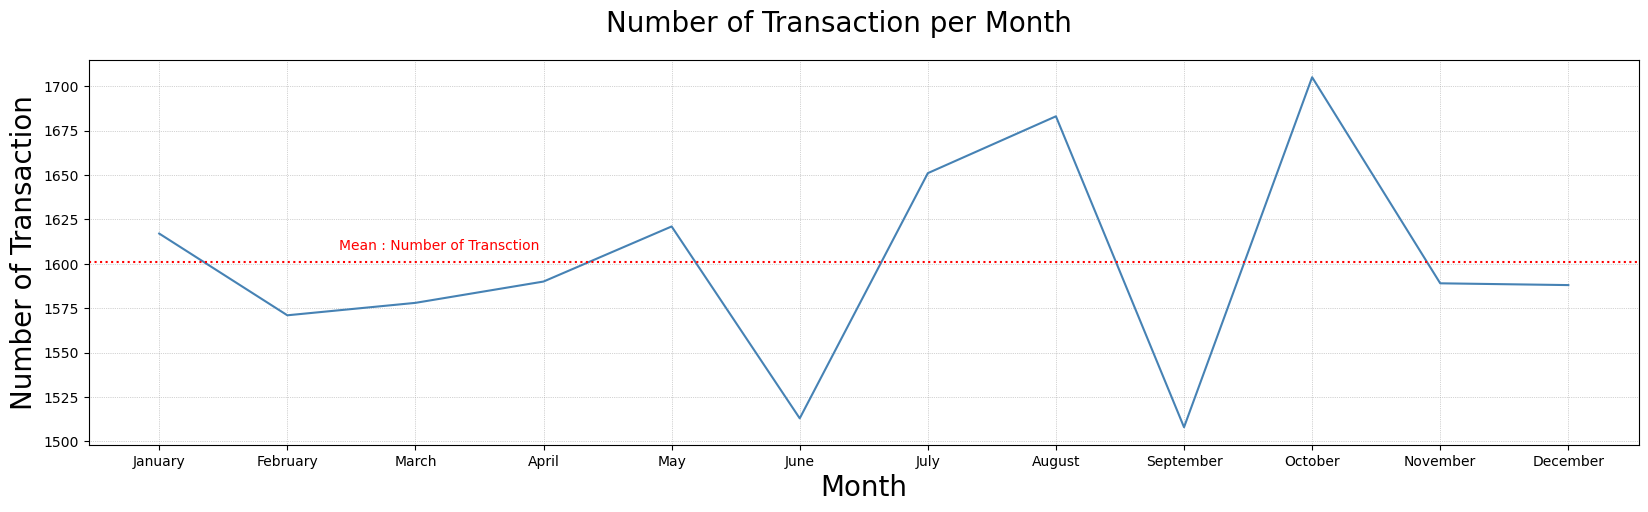

In [67]:
fig = plt.figure(figsize=(20, 5))

fig.suptitle('Number of Transaction per Month', fontsize=20)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Number of Transaction', fontsize=20)

x = transaction_per_month['month']
y = transaction_per_month['number_of_transaction']
mean = y.mean()

plt.plot(x, y, color = 'steelblue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.axhline(y=mean, color='red', linestyle=':')
plt.text(0.25, 0.5, 'Mean : Number of Transction', transform=fig.transFigure, color='red')
plt.show()

#### **Number of Transaction per Day**
---

In [68]:
month_daily_transaction = data_transaction.groupby(['transaction_month','transaction_day'])[['customer_id']].count()
month_daily_transaction.reset_index(inplace=True)
month_daily_transaction.columns = ['month','day','number_of_transaction']

month_daily_transaction['month'] = pd.Categorical(month_daily_transaction['month'], month_order)
month_daily_transaction.sort_values(['month','day'], inplace=True)
month_daily_transaction

,month,day,number_of_transaction
119,January,01,52
120,January,02,45
121,January,03,53
122,January,04,55
123,January,05,63
...,...,...,...
86,December,26,54
87,December,27,50
88,December,28,55
89,December,29,51


<AxesSubplot: xlabel='day', ylabel='month'>

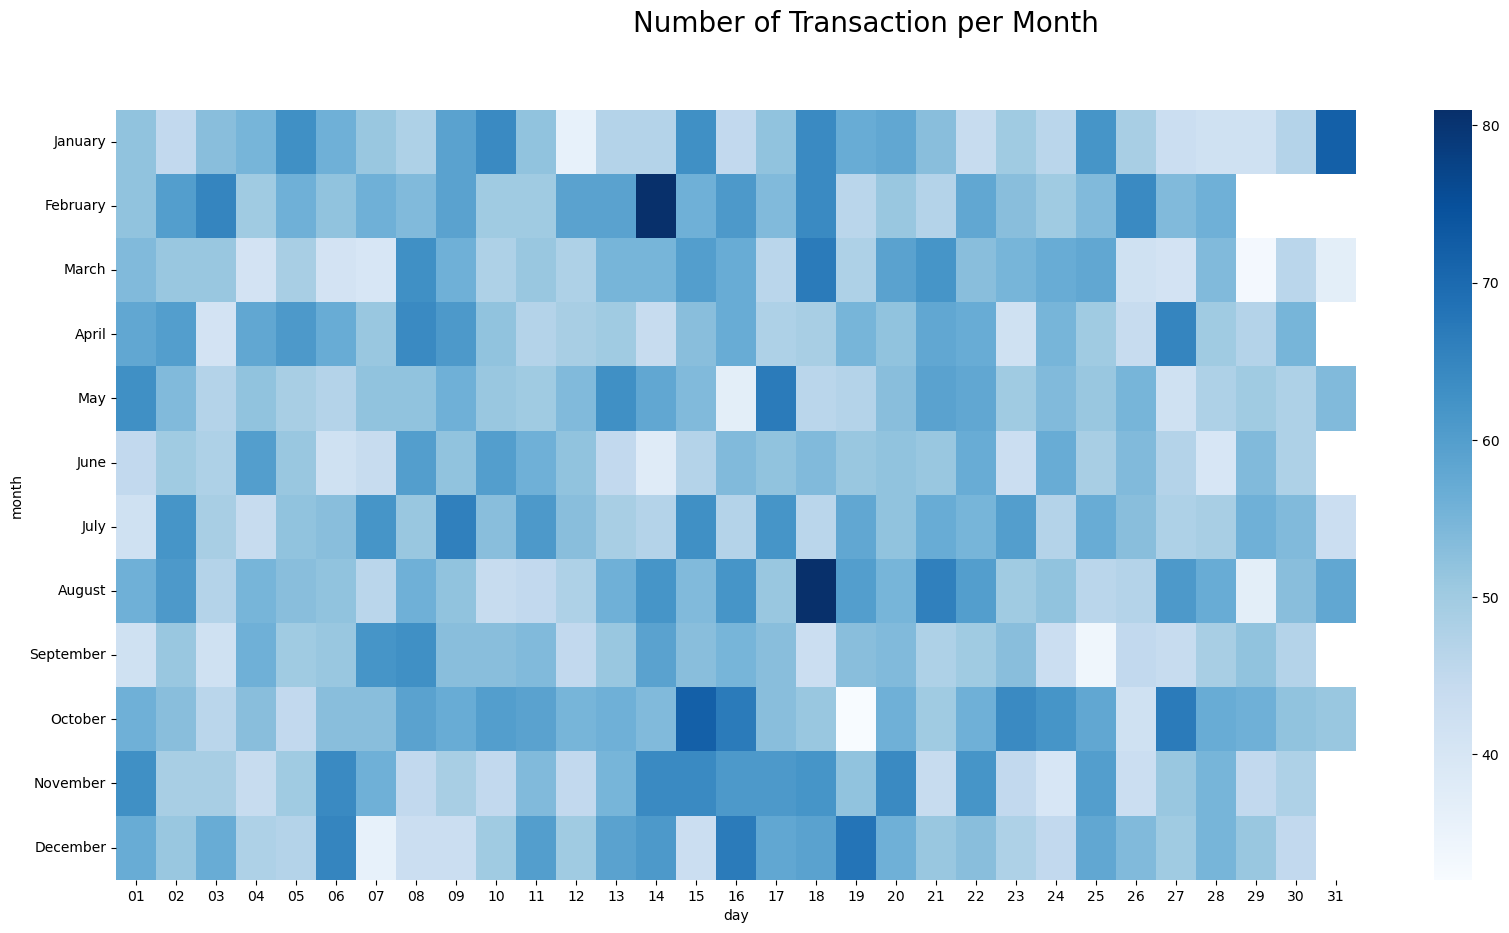

In [69]:
fig, ax = plt.subplots(figsize=(20,10))
fig.suptitle('Number of Transaction per Month', fontsize=20)
map = month_daily_transaction.pivot('month', 'day', 'number_of_transaction')
sns.heatmap(map, cmap='Blues')

#### **Daily Transaction Trend**
---

In [70]:
daily_transaction = data_transaction.groupby(['transaction_weekday'])[['customer_id']].count()
daily_transaction.reset_index(inplace=True)
daily_transaction.columns = ['weekday','number_of_transaction']

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_transaction['weekday'] = pd.Categorical(daily_transaction['weekday'], weekday_order)
daily_transaction.sort_values('weekday', inplace=True)
daily_transaction

,weekday,number_of_transaction
1,Monday,2763
5,Tuesday,2747
6,Wednesday,2795
4,Thursday,2690
0,Friday,2693
2,Saturday,2751
3,Sunday,2775


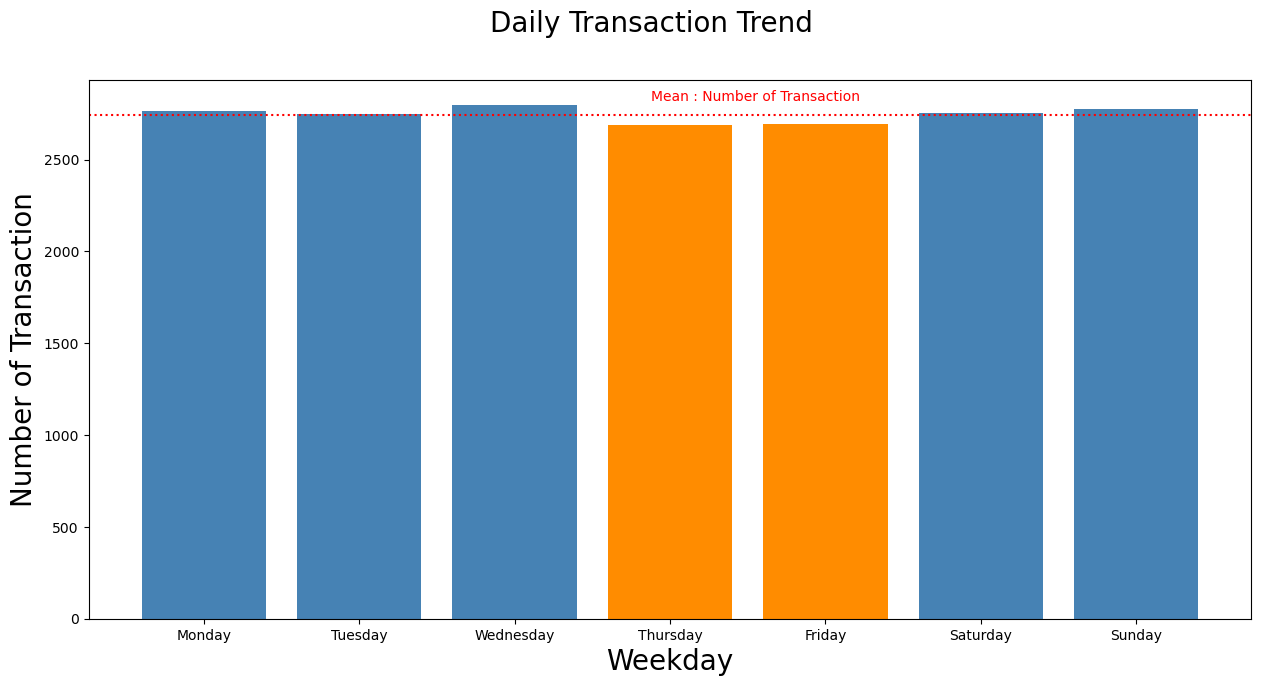

In [71]:
fig = plt.figure(figsize=(15, 7))

fig.suptitle('Daily Transaction Trend', fontsize=20)
plt.xlabel('Weekday', fontsize=20)
plt.ylabel('Number of Transaction', fontsize=20)

x = daily_transaction['weekday']
y = daily_transaction['number_of_transaction']
mean = y.mean()

colors = []
for value in daily_transaction['number_of_transaction']:
    if value < mean:
        colors.append('darkorange')
    else:
        colors.append('steelblue')

plt.bar(x, y, color=colors)
plt.axhline(y=mean, color='r', linestyle=':')
plt.text(0.5, 0.85, 'Mean : Number of Transaction', transform=fig.transFigure, color='r')
plt.show()

# **RFM ANALYSIS**
---

## **1. Data Preparation**

Before segmenting, we must find the recency, frequency, and monetary values. To get the recency value, we have to calculate the last purchase from the transaction_date column. And to get the monetary value, we have to create a new profit column. 

In [78]:
data_rfm = data_merged.copy()

In [79]:
# making last purchase column for recency
most_recent_purchase = data_rfm['transaction_date'].max()
data_rfm['last_purchase_days_ago'] = most_recent_purchase - data_rfm['transaction_date']
data_rfm['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
data_rfm['last_purchase_days_ago'] = data_rfm['last_purchase_days_ago'].astype('int64')

# making column profit for monetery
data_rfm['profit'] = data_rfm['list_price'] - data_rfm['standard_cost']

## **2. Data Aggregation**

1. The recency value of each customer is obtained from the smallest recency value from the dataset.
2. The frequency value of each customer is obtained from the count of transactions they place.
3. The monetary value of each customer is obtained from the profit (list_price - standard_cost).

In [80]:
# making rfm table
rfm_table = data_rfm.groupby('customer_id').agg({'last_purchase_days_ago': lambda x: x.min(),
                                                    'customer_id': lambda x: len(x),
                                                    'profit': lambda x: x.sum()})

rfm_table.rename(columns={'last_purchase_days_ago': 'recency', 
                          'customer_id': 'frequency', 
                          'profit': 'monetary'}, inplace=True)

In [81]:
rfm_table

,recency,frequency,monetary
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
4,195,2,220.57
5,16,6,2394.94
6,64,5,3946.55
...,...,...,...
3496,256,4,2045.84
3497,52,3,1648.32
3498,127,6,3147.33


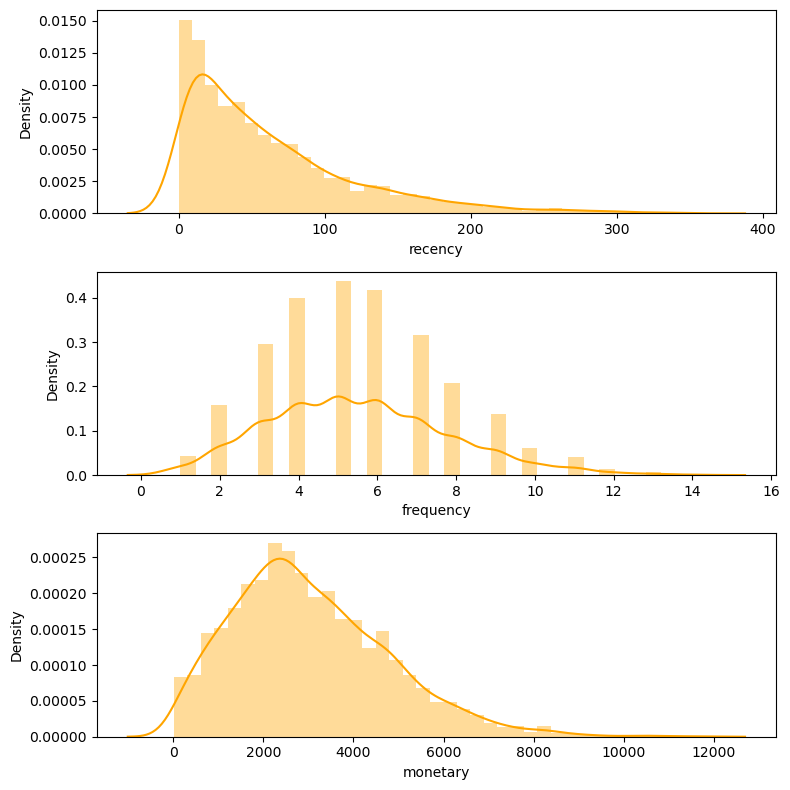

In [82]:
# looking distribution
rfm = ['recency', 'frequency', 'monetary']

plt.figure(figsize=(8, 8))
for i in range(0, len(rfm)):
    plt.subplot(len(rfm), 1, i+1)
    sns.distplot(rfm_table[rfm[i]], color='orange')
    plt.tight_layout()

All data looks right-skewed.

## **3. Scoring**

The qcut function will calculate the score in the column according to the quartile calculation, the output is a range of 1-5. Customers get more points if they make frequent purchases, make a lot of purchases, and spend a lot of money.

In [83]:
# Recency, if the transaction happened recently give 5 points . 
rfm_table['R_score'] = pd.qcut(rfm_table['recency'], 5, labels=[5, 4, 3, 2, 1])

# Frequency, 5 = Most frequent , 1 = rarely
rfm_table['F_score'] = pd.qcut(rfm_table['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Monetery, 5 = best, 1 = least
rfm_table['M_score'] = pd.qcut(rfm_table['monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm_table.head(5)

,recency,frequency,monetary,R_score,F_score,M_score
customer_id,,,,,,
1,7,11,3018.09,5,5,3
2,128,3,2226.26,1,1,2
4,195,2,220.57,1,1,1
5,16,6,2394.94,4,3,2
6,64,5,3946.55,2,2,4


Next combine all the scores into one, using a set of rules applied to the R-F-M category and average score.

In [87]:
# creating rfm score
rfm_table['RFM_segment'] = rfm_table['R_score'].astype(str) + rfm_table['F_score'].astype(str) + rfm_table['M_score'].astype(str)
rfm_table['RFM_score'] = ((rfm_table['R_score'].astype('int64') + rfm_table['F_score'].astype('int64') + rfm_table['M_score'].astype('int64')) / 3).round(2)

In [85]:
rfm_table.sample(5)

,recency,frequency,monetary,R_score,F_score,M_score
customer_id,,,,,,
743,89,4,3908.80,2,2,4
3322,141,3,1066.19,1,1,1
2166,58,6,3071.34,3,4,3
1889,135,5,3710.54,1,3,4
2297,37,5,4274.88,3,3,4


## 4. **Segmentation and Score Labeling**

After calculations on the RFM data we can create customer segments:

- Champions: Bought recently, buy often and spend the most
- Loyal customers: Buy on a regular basis. Responsive to promotions.
- Potential loyalist: Recent customers with average frequency.
- Recent customers: Bought most recently, but not often.
- Promising: Recent shoppers, but haven’t spent much.
- Needs attention: Above average recency, frequency and monetary values. May not have bought very recently though.
- About to sleep: Below average recency and frequency. Will lose them if not reactivated.
- At risk: Some time since they’ve purchased. Need to bring them back!
- Can’t lose them: Used to purchase frequently but haven’t returned for a long time.
- Hibernating: Last purchase was long back and low number of orders. May be lost.

We will use Recency and Frequency to segment our customers and determined how to segment customers using regex.

In [89]:
# creating segment
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [91]:
# applying segment
rfm_table['Segment'] = rfm_table['R_score'].astype(str) + rfm_table['F_score'].astype(str)
rfm_table['Segment'] = rfm_table['Segment'].replace(seg_map, regex=True)

In [134]:
# create labels for the scores
rfm_table['Score'] = np.where(rfm_table['RFM_score'] > 4, 'Diamond',
                              np.where(rfm_table['RFM_score'] > 3, 'Platinum',
                                       np.where(rfm_table['RFM_score'] > 2, 'Gold',
                                                np.where(rfm_table['RFM_score'] > 1, 'Silver',
                                                         'Bronze'))))

In [249]:
rfm_table.sample(10)

,recency,frequency,monetary,R_score,F_score,M_score,RFM_segment,RFM_score,Segment,Score
customer_id,,,,,,,,,,
3149,22,3,2036.78,4,1,2,412,2.33,Promising,Gold
1808,76,7,7965.28,2,4,5,245,3.67,At Risk,Platinum
370,111,7,3290.26,1,4,4,144,3.00,At Risk,Gold
1018,26,5,2497.80,4,3,3,433,3.33,Potential Loyalists,Platinum
2756,56,3,380.70,3,1,1,311,1.67,About to Sleep,Silver
2171,34,6,1251.33,3,4,1,341,2.67,Loyal Customers,Gold
1669,59,6,3361.10,3,4,4,344,3.67,Loyal Customers,Platinum
3366,44,4,2264.10,3,2,2,322,2.33,About to Sleep,Gold
3308,67,3,953.15,2,1,1,211,1.33,Hibernating,Silver


## **5. Analysis**

In [197]:
rfm_data = rfm_table.reset_index().copy()

### **5.1. Statistical Summary**

In [221]:
# create agg dictionary
agg_dict = {'customer_id': 'count', 
            'recency': 'mean',
            'frequency': 'mean',
            'monetary': 'mean'}

#### **Score**
---

In [222]:
score_cat =['Diamond', 'Platinum', 'Gold', 'Silver', 'Bronze']
rfm_data['Score'] = pd.Categorical(rfm_data['Score'], categories = score_cat)

df_sc = rfm_data.groupby('Score').agg(agg_dict).reset_index()
df_sc.rename({'Score': 'Score', 'customer_id': 'count'}, axis=1, inplace=True)
df_sc['count %'] = (100 * df_sc['count'] / df_sc['count'].sum()).round(2)
df_sc['monetary %'] = (100 * df_sc['monetary'] / df_sc['monetary'].sum()).round(2)
df_sc

,Score,count,recency,frequency,monetary,count %,monetary %
0,Diamond,576,18.059028,8.555556,5337.545382,16.55,38.67
1,Platinum,1050,40.360000,6.500000,3708.766990,30.16,26.87
2,Gold,980,61.287755,4.816327,2460.730082,28.15,17.83
3,Silver,677,101.161004,3.423929,1589.987253,19.45,11.52
4,Bronze,198,188.560606,2.136364,704.491212,5.69,5.10


#### **Segment**
---

In [223]:
df_seg = rfm_data.groupby('Segment').agg(agg_dict).reset_index()
df_seg.rename({'Segment': 'Segment', 'customer_id': 'count'}, axis=1, inplace=True)
df_seg['count %'] = (100 * df_seg['count'] / df_seg['count'].sum()).round(2)
df_seg['monetary %'] = (100 * df_seg['monetary'] / df_seg['monetary'].sum()).round(2)
df_seg.sort_values(by='count', ascending=False, inplace=True)
df_seg

,Segment,count,recency,frequency,monetary,count %,monetary %
4,Hibernating,745,136.132886,3.182550,1717.452228,21.40,5.94
5,Loyal Customers,664,35.368976,7.756024,4324.803268,19.07,14.95
8,Potential Loyalists,538,14.808550,4.860595,2688.039870,15.46,9.29
1,At Risk,486,105.043210,5.831276,3292.843333,13.96,11.39
3,Champions,380,6.931579,8.042105,4431.822000,10.92,15.32
0,About to Sleep,234,46.487179,3.538462,1838.694274,6.72,6.36
2,Can't Loose,140,89.450000,8.535714,4488.522786,4.02,15.52
6,Need Attention,138,45.028986,5.391304,2944.132246,3.96,10.18
9,Promising,87,22.678161,2.678161,1612.283908,2.50,5.58
7,New Customers,69,7.521739,2.724638,1581.160000,1.98,5.47


#### **Recency vs Frequency**
---

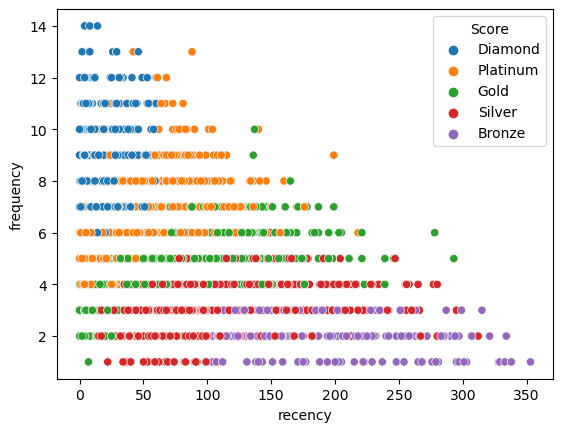

In [159]:
data = pd.DataFrame(data=rfm_data,columns=['customer_id','Score','recency','frequency','monetary'])

# plot data with seaborn
facet = sns.scatterplot(data=data, x='recency', y='frequency', hue='Score', palette='tab10')

#### **Monetery vs Frequency**
---

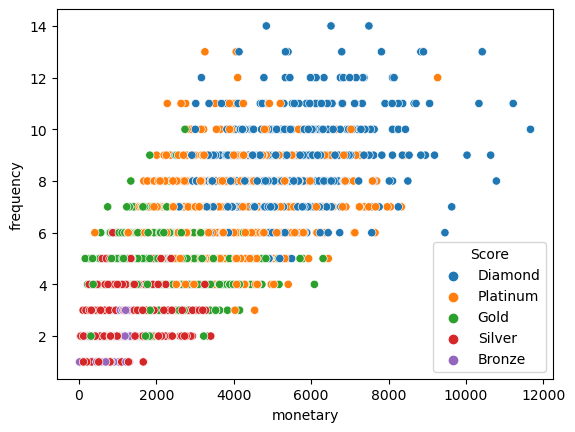

In [161]:
# plot data with seaborn
facet = sns.scatterplot(data=data, x='monetary', y='frequency', hue='Score', palette='tab10')

#### **Recency vs Frequency vs Monetary**
---

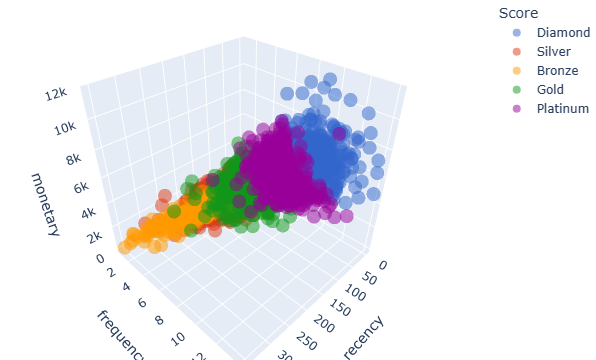

In [169]:
# rfm_data['Score'] = rfm_data['Score'].astype(str)
import plotly.express as px
fig = px.scatter_3d(rfm_data,x='recency', y='frequency', z='monetary',
              color='Score', opacity=0.5,color_discrete_sequence=px.colors.qualitative.G10)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

### **5.2. Interpretation**

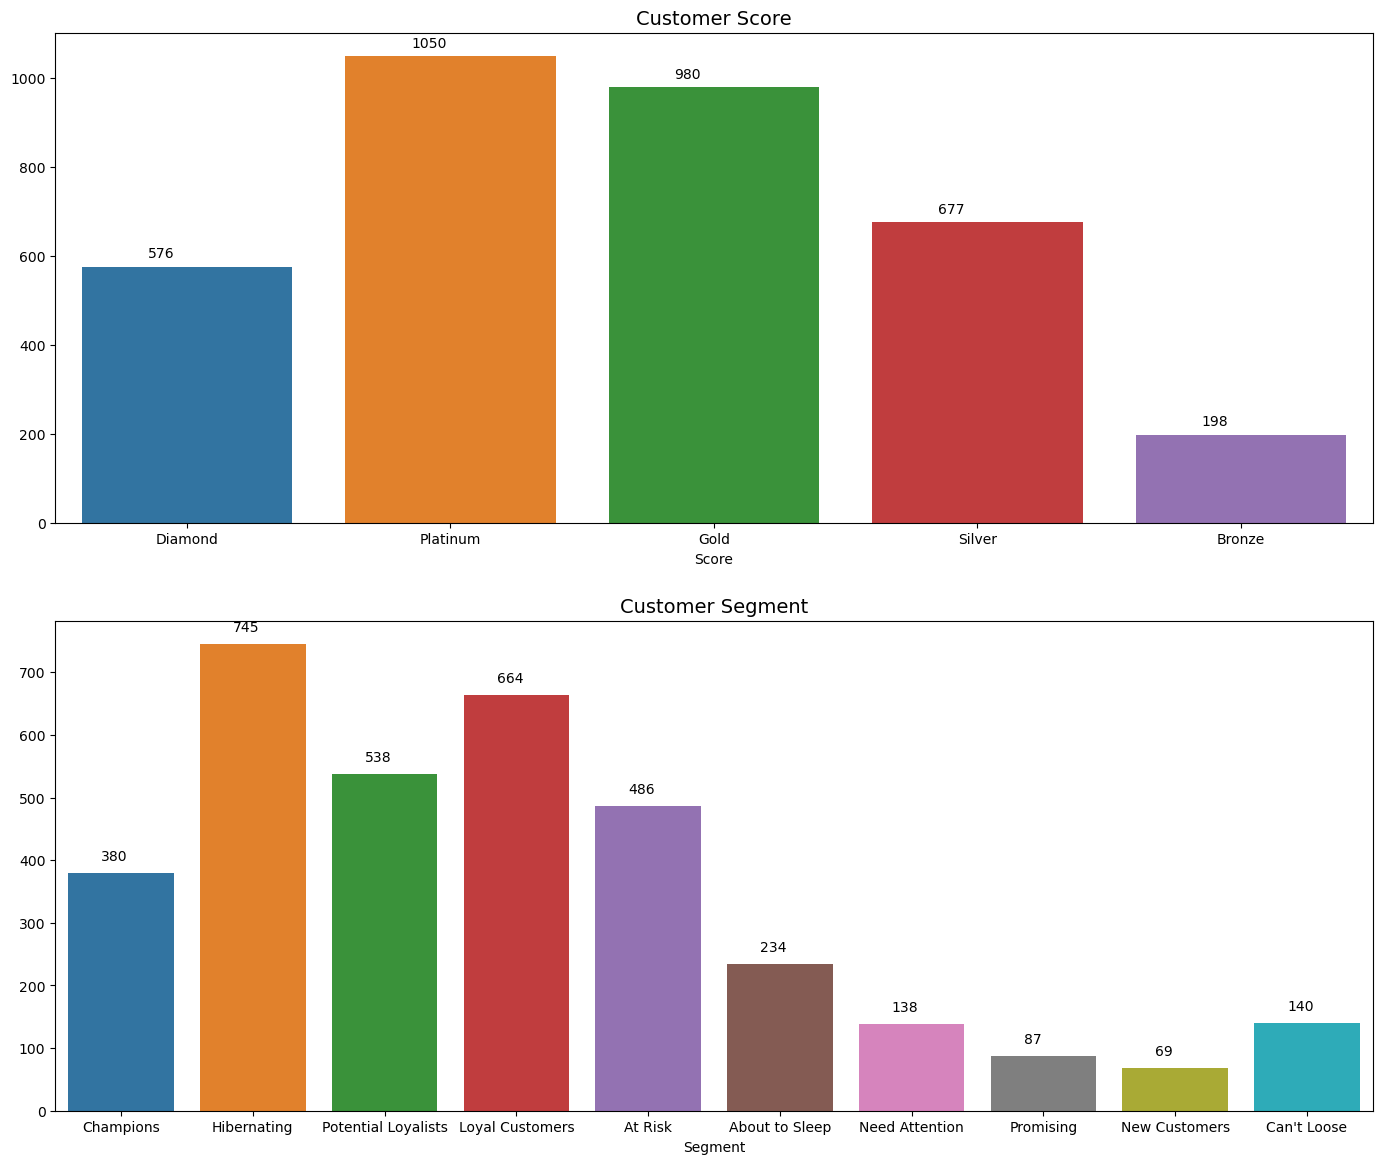

In [245]:
#Bar chart - count
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(17,14))

sns.countplot(x='Score',data=rfm_data,ax=ax[0],palette='tab10')
sns.countplot(x='Segment',data=rfm_data,ax=ax[1],palette='tab10')

ax[0].set_ylabel('')
ax[0].set_title('Customer Score', fontsize=14)

ax[1].set_ylabel('')
ax[1].set_title('Customer Segment', fontsize=14)

for p in ax[0].patches:
    ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+20))
for p in ax[1].patches:
    ax[1].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+20))


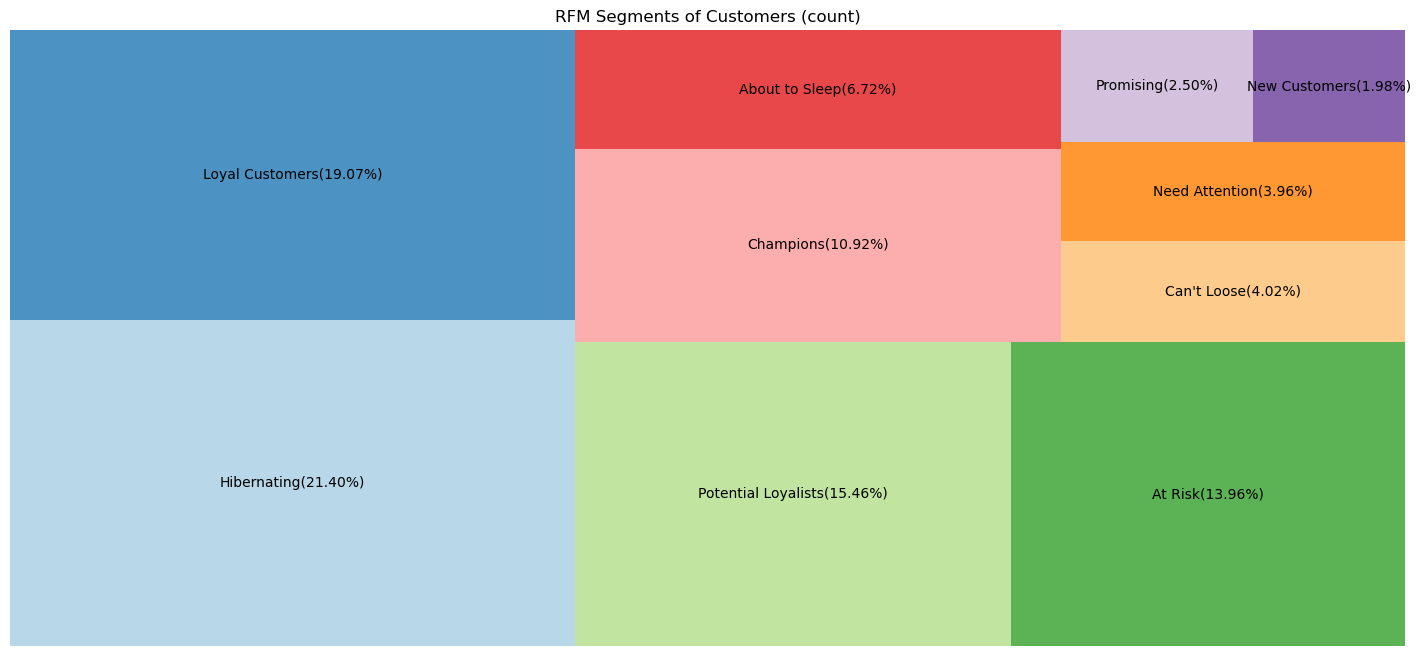

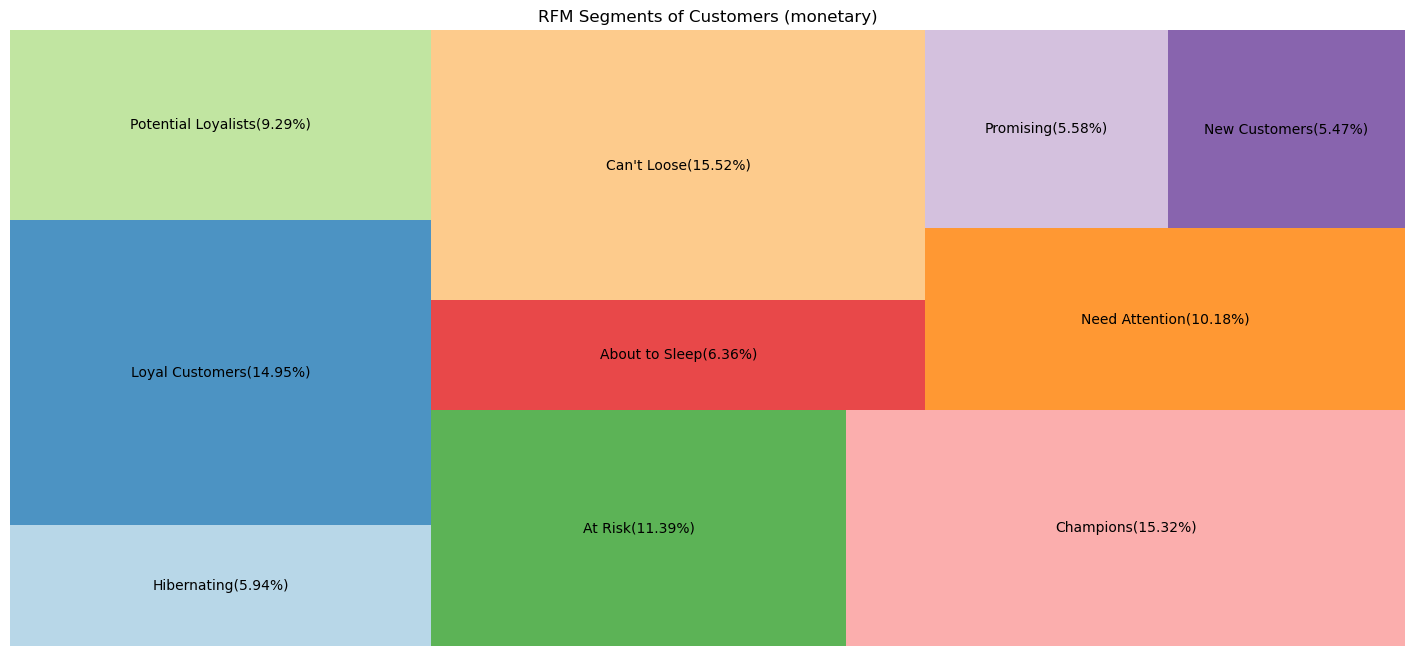

In [248]:
import squarify
import matplotlib.pyplot as plt

for col in ['count', 'monetary']:
    labels = df_analysis['Segment'] + df_analysis[col + ' %'].apply(lambda x: '({0:.2f}%)'.format(x))

    fig, ax = plt.subplots(figsize=(18,8))
    squarify.plot(sizes=df_analysis[col], label=labels, alpha=.8, color=sns.color_palette('Paired', len(df_analysis)))
    ax.set_title('RFM Segments of Customers (%s)' % col)
    plt.axis('off')
    plt.show()

In [187]:
# Aggregate data by each customer
rfm1 = rfm_data.groupby(['Score','Segment'])['Segment'].count()
rfm1 = rfm1.reset_index(name='count')
rfm1['percentage'] =  (100 * rfm1['count'] / rfm1.groupby('Score')['count'].transform('sum')).round(2)
# rfm1
pvt = rfm1.pivot_table(index='Score', columns='Segment', values='percentage')
pvt

Segment,About to Sleep,At Risk,Can't Loose,Champions,Hibernating,Loyal Customers,Need Attention,New Customers,Potential Loyalists,Promising
Score,,,,,,,,,,
Diamond,0.00,0.00,0.00,49.65,0.00,47.40,0.00,0.00,2.95,0.00
Platinum,0.10,11.24,12.00,8.95,0.00,34.57,5.43,0.19,27.43,0.10
Gold,10.82,31.63,1.43,0.00,10.00,2.86,8.27,6.84,23.78,4.39
Silver,18.76,8.57,0.00,0.00,66.32,0.00,0.00,0.00,0.00,6.35
Bronze,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00


|Customer Score|%|RFM Segment|RFM Interpretation|Actionable Insight|
|---|---|---|---|---|
|Diamond|17%|50% Champions; 47% Loyal Customers|||
|Platinum|30%|35% Loyal Customers; 27% Potential Loyalists|||
|Gold|28%|32% At Risk; 24% Potential Loyalists|||
|Silver|20%|66% Hibernating; 19% About to Sleep|||
|Bronze|6%|100% Hibernating|||